## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

The ag news dataset comprises around 18000 news text in 4 categories.

In [2]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv("C:/Users/sgheb/Downloads/agnews.csv", sep=',', usecols = lambda col: col not in ["Unnamed: 0"])
mydata_train

,ClassIndex,Title,Description
0,1,"""Greed and arrogance,"" made Rod Stewart keep c...",AFP - Raspy-voiced British Rock star Rod Stewa...
1,1,Darfur families face food misery,A World Food Programme survey says almost half...
2,1,Italy looks for Arab support to free hostages ...,ROME : A top Italian official leaves for the M...
3,1,Air pollution causes five million deaths each ...,AFP - As many as five million deaths are cause...
4,2,Fergie: Only A Win Will Do,Sir Alex Ferguson is convinced Manchester Unit...
...,...,...,...
17995,2,NFL Wrap: Gibbs Returns to NFL as Redskins Edg...,Clinton Portis ran 64 yards for a touchdown an...
17996,4,Possible Source of Cosmic Rays Found (SPACE.com),SPACE.com - Astronomers have produced the firs...
17997,2,Indy 500 changes aimed at regaining interest,Indianapolis Motor Speedway president Tony Geo...
17998,4,Speech code from IBM to become open source,IBM plans to announce Monday that it will cont...


In [3]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex))

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 4, 2, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 2, 4, 4, 2, 3, 4, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 3, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 4, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 1, 2, 3, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 3, 1, 4, 4, 4, 4, 2, 3, 3, 3, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 1, 

In [4]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))

18000
18000


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.Description

## Preprocessing the Corpus

In [7]:
# Preprocessing the data

import string
string.punctuation

stopword = nltk.corpus.stopwords.words('english')

def removePunctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

def removeStopwords(text):
    return " ".join([word for word in re.split('\W+', text)
        if word not in stopword])

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    lowercased_line = line.lower()
    removed_punc = removePunctuation(lowercased_line)
    removed_stopwords = removeStopwords(removed_punc)
    tokens = word_tokenize(removed_stopwords)
    lines.append(tokens)
    for word in tokens:
        if word not in word_list:
            word_list.append(word)
        
 

# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(lines) 
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
index = 0
for word in word_list:
    dict_idx[word] = index
    index += 1

In [8]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in word_list:
        freq_word[word] = 0
        for tokens in lines:
            if word in tokens:
                freq_word[word] += 1
    return freq_word

In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'drogue': 1,
 'recalled': 9,
 'forecast': 78,
 'exrangers': 1,
 'hacked': 4,
 'gdp': 6,
 'biggerthanexpected': 3,
 'quotrather': 1,
 'ltd': 121,
 'quicktest': 1,
 'kuznetsova': 13,
 'mixedtolower': 1,
 'unpopularpresident': 1,
 'kirkland': 4,
 'umbrellaltbr': 1,
 'specialist': 12,
 '36530million': 1,
 'usdas': 1,
 'expenses': 19,
 'workout': 3,
 'montecito': 2,
 'pan': 2,
 'stereos': 1,
 'confirmation': 10,
 'divorce': 3,
 '989750euro': 1,
 'endkellen': 1,
 'lofted': 1,
 'two': 1151,
 'sendingtheir': 1,
 'scrap': 9,
 'targetstocksquickinfofullquotegtwppgyoltagton': 1,
 'drab': 1,
 '181yearold': 1,
 'companyowned': 1,
 'si': 2,
 'disagreement': 3,
 'forecasting': 5,
 'giveandgos': 1,
 'newfound': 4,
 'quottitfortat': 1,
 '108135': 1,
 'brand': 30,
 'incisive': 1,
 'hadsome': 1,
 'gaspowered': 1,
 'land': 34,
 'considered': 30,
 'veiga': 3,
 'asking': 16,
 'learning': 11,
 'governors': 6,
 'governmentsaid': 1,
 'terrorists': 39,
 '39round': 1,
 'fpl': 1,
 'edgbaston': 4,
 'assume': 7,
 

In [10]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    numTimes = 0
    totalNum = len(document)
    for token in document:
        if word == token:
            numTimes += 1
    tf = numTimes / totalNum
    return tf

In [11]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    numDocumentsContainingWord = freq_word.get(word, 0) + 1
    idf = np.log10(total_docs/numDocumentsContainingWord)
    return idf

In [12]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        tfidf = tf * idf
        tf_idf_vec[dict_idx[word]] = tfidf  
    return tf_idf_vec

In [13]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

listOfVectors = []

for line in lines:
    vector = tfidf(line, dict_idx)
    listOfVectors.append(vector)

## Multinomial Naive Bayes (10 Points)

In [14]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB()
model.fit(listOfVectors, mydata_train.ClassIndex)

MultinomialNB()

In [15]:
#Perform testing on the train dataset

pred = model.predict(listOfVectors)

In [16]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.ClassIndex, pred, average='micro')
Accuracy = metrics.accuracy_score(mydata_train.ClassIndex, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9275
Accuracy:  0.9275


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [17]:
# install libraries
!pip install wikipedia
!pip install adjustText

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 
I chose to clean the text because cleaning the text makes the text more easily understandable for the NLP model. Also, cleaning the text removes texts/characters that are not important/relevant to the analysis and that only provide noise. Clustering is very sensitive to noisy data and thus not cleaning the text may lead to the model performing poorly and not giving useful results. 

In [25]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

string.punctuation

stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def toLowerCase(text):
    return text.lower()

def removePunctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

def removeURLs(text):
    text = re.sub(r"http\S+", "", text) # replaces URLs starting with http 
    text = re.sub(r"www.\S+", "", text) # replaces URLs starting with www
    return text

def removeStopwords(text):
    return " ".join([word for word in re.split('\W+', text)
        if word not in stopword])

def performStemming(text):
     return" ".join([ps.stem(word) for word in re.split('\W+', text)])


def clean_message(message):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    lower_case = toLowerCase(message)
    removed_links = removeURLs(lower_case)
    removed_punct = removePunctuation(removed_links)
    removed_stopwords = removeStopwords(removed_punct)
    review_cleaned = performStemming(removed_stopwords)

    return review_cleaned

In [26]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Basketball", "Tennis", "Football", "Natural language processing", "Machine learning", "Artificial intelligence",
         "Bank of America", "Visa Inc.", "European Central Bank"]

# list of articles to be downloaded
articles = [wikipedia.page("LebronJames"), wikipedia.page("ChrisBosh"), wikipedia.page("SerenaWilliams"), 
            wikipedia.page("TomBrady"), wikipedia.page("Andre_Agassi"), wikipedia.page("PeytonManning"),
            wikipedia.page("DwyaneWade"), wikipedia.page("Naomi_Osaka"), wikipedia.page("JerryRice"),
           wikipedia.page("Lemmatisation"), wikipedia.page("Supervised_learning"), wikipedia.page("Bayesian_network"),
            wikipedia.page("Stemming"), wikipedia.page("Unsupervisedlearning"), wikipedia.page("KnowledgeRepresentation"),
            wikipedia.page("SentimentAnalysis"), wikipedia.page("ReinforcementLearning"), wikipedia.page("SemanticNetwork"),
           wikipedia.page("Debit_card"), wikipedia.page("European_debt_crisis"), wikipedia.page("Bank_of_America_Corporate_Center"),
           wikipedia.page("CreditCard"), wikipedia.page("BrianMoynihan"), wikipedia.page("MonetaryPolicy"),
           wikipedia.page("Stored-value_card"), wikipedia.page("InvestmentBanking"), wikipedia.page("Christine_Lagarde")]

# download and store articles (summaries) in this variable
data = []
for article in articles:
    cleaned_article = clean_message(article.summary)
    data.append(cleaned_article)

print(data[0])

lebron raymon jame sr born decemb 30 1984 american profession basketbal player lo angel laker nation basketbal associ nba nicknam king jame consid one greatest basketbal player histori often compar michael jordan debat greatest basketbal player time jame alltim lead scorer nba histori rank fourth career assist four nba championship two miami heat one cleveland cavali lo angel laker compet 10 nba final four mvp award four final mvp award two olymp gold medal name allstar 19 time select allnba team 18 time includ 13 first team select alldefens team six timesjam grew play basketbal st vincent st mari high school hometown akron ohio heavili tout nation media futur nba superstar preptopro select cleveland cavali first overal pick 2003 nba draft name 2004 nba rooki year soon establish one leagu premier player win nba mvp award 2009 2010 lead cavali first nba final appear 2007 fail win championship cleveland jame left 2010 free agent join miami heat announc nation televis special titl decis a

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
vectorizer.get_feature_names_out()

array(['03', '07', '09', ..., 'ɔdɛt', 'なおみ', '大坂'], dtype=object)

In [28]:
print(X.shape)

(27, 1595)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [29]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
results = tsne.fit_transform(X)
X = results[:, 0]
Y = results[:, 1]

Plot and annotate the points with different markers for different expected groups.

8

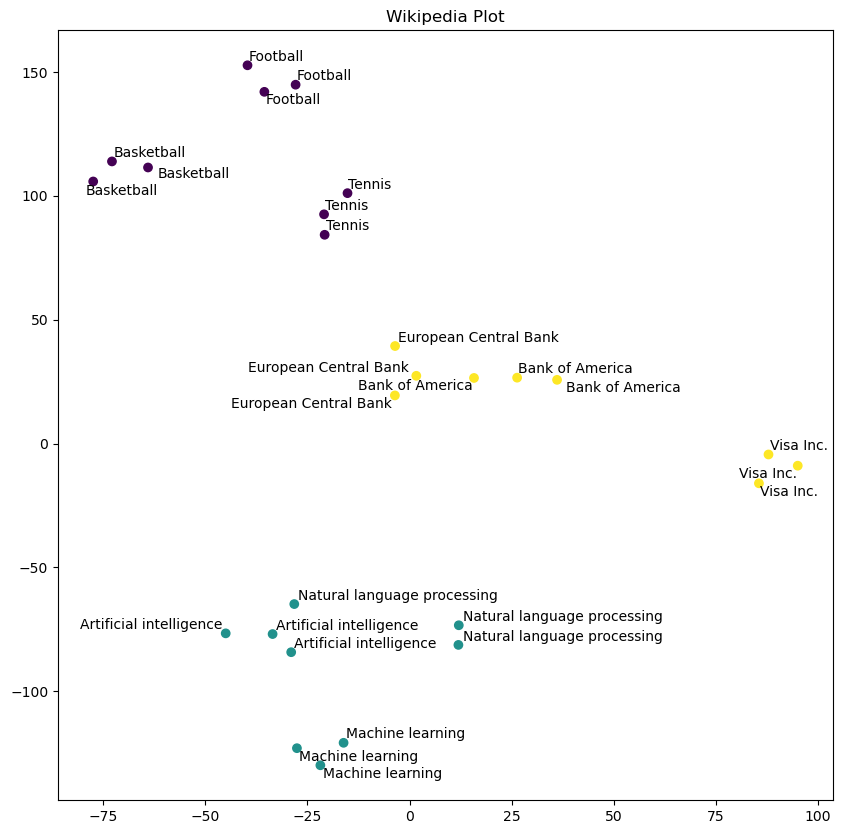

In [30]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# get a figure handle
fig,ax = plt.subplots(figsize=(10,10))
n = [topics[0], topics[0], topics[1], topics[2], topics[1], topics[2], topics[0], topics[1], topics[2], topics[3], 
     topics[4], topics[5], topics[3], topics[4], topics[5], topics[3], topics[4], topics[5], topics[7], topics[8], 
     topics[6], topics[7], topics[6], topics[8], topics[7], topics[6], topics[8]]
Cluster = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])
ax.scatter(X, Y, c=Cluster)
ax.set_title('Wikipedia Plot')

texts = [plt.text(X[i], Y[i], n[i]) for i in range(len(n))]
adjust_text(texts)

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
The T-SNE seems to have performed really well as you can see there are 3 distinct clusters on the plot for the 3 different categories of sports, computer science, and finance. Also, all of the related topics within each category seem to cluster together. For example, all of the basketball, tennis and football article points are pretty close to each other, as well as all the ML, NLP and AI points.    

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [41]:
# Import the data.csv only use 'text' and 'target' columns

# data

# and printout the train.shape and validation.shape 

# expected shape of dataset is (7613, 2)

df = pd.read_csv("C:/Users/sgheb/Downloads/data-1.csv", sep=',', usecols = ['text', 'target'])
print(df.shape)
df

(7613, 2)


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [42]:
# clean the text in the dataframe using the clean_text function provided above
df['text'] = df['text'].apply(lambda x: clean_text(x))
df

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,13000 people receive wildfire evacuation order...,1
4,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...
7608,two giant crane holding bridge collapse nearby...,1
7609,ariaahrary thetawniest control wild fire calif...,1
7610,m194 0104 utc5km volcano hawaii,1
7611,police investigating ebike collided car little...,1


In [43]:
# initialise count vectorizer from sklearn module with default parameter

# fit and transform on dataset

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(list(df.text))
vectorizer.get_feature_names_out()

array(['0011', '001116', '0025', ..., 'ûónegligence', 'ûótech', 'ûówe'],
      dtype=object)

In [44]:
# get the values of target column

y = df.target

In [45]:
!pip install tensorflow

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [46]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 64 units and relu activation
    x = tf.keras.layers.Dense(64, activation='relu')(inp)    

  # layer 3 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(rate = 0.5)(x)
  
  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer='l2')(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(rate = 0.5)(x) 

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer='l2')(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(rate = 0.5)(x)

  # layer 8 : output layer with units equal to 1 and activation as sigmoid
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc
    model = tf.keras.models.Model(inputs=inp, outputs=x)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='rmsprop', metrics=[tf.keras.metrics.AUC()])

    return model


Epoch 1/5
381/381 [==============================] - 3s 7ms/step - loss: 0.7875 - auc_5: 0.7279 - val_loss: 0.6443 - val_auc_5: 0.7361
Epoch 2/5
381/381 [==============================] - 3s 7ms/step - loss: 0.4916 - auc_5: 0.8732 - val_loss: 0.6350 - val_auc_5: 0.7357
Epoch 3/5
381/381 [==============================] - 3s 7ms/step - loss: 0.4246 - auc_5: 0.9003 - val_loss: 0.6319 - val_auc_5: 0.7392
Epoch 4/5
381/381 [==============================] - 3s 7ms/step - loss: 0.3960 - auc_5: 0.9118 - val_loss: 0.6372 - val_auc_5: 0.7370
Epoch 5/5
191/191 [==============================] - 1s 4ms/step


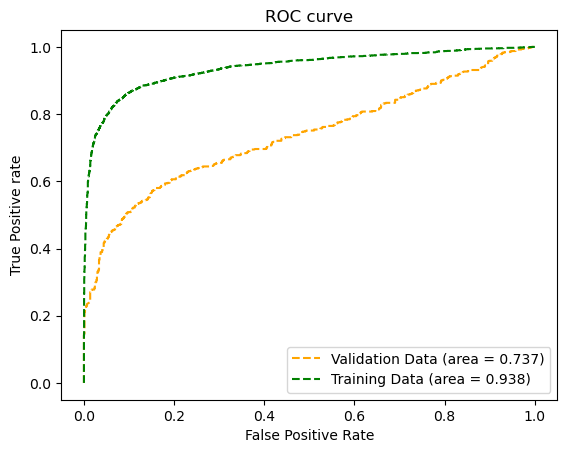

Epoch 1/5
381/381 [==============================] - 4s 9ms/step - loss: 0.7775 - auc_6: 0.7353 - val_loss: 0.6690 - val_auc_6: 0.7108
Epoch 2/5
381/381 [==============================] - 4s 10ms/step - loss: 0.4798 - auc_6: 0.8832 - val_loss: 0.6921 - val_auc_6: 0.7045
Epoch 3/5
381/381 [==============================] - 4s 12ms/step - loss: 0.4142 - auc_6: 0.9074 - val_loss: 0.7142 - val_auc_6: 0.7057
Epoch 4/5
381/381 [==============================] - 5s 12ms/step - loss: 0.3833 - auc_6: 0.9194 - val_loss: 0.7297 - val_auc_6: 0.6993
Epoch 5/5
191/191 [==============================] - 1s 5ms/step


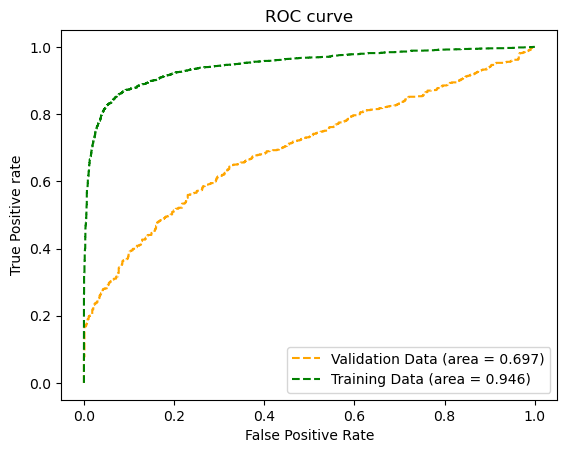

Epoch 1/5
381/381 [==============================] - 7s 16ms/step - loss: 0.7803 - auc_7: 0.7344 - val_loss: 0.6515 - val_auc_7: 0.7522
Epoch 2/5
381/381 [==============================] - 5s 13ms/step - loss: 0.4779 - auc_7: 0.8808 - val_loss: 0.6349 - val_auc_7: 0.7555
Epoch 3/5
381/381 [==============================] - 5s 13ms/step - loss: 0.4123 - auc_7: 0.9059 - val_loss: 0.6805 - val_auc_7: 0.7563
Epoch 4/5
381/381 [==============================] - 6s 15ms/step - loss: 0.3852 - auc_7: 0.9163 - val_loss: 0.6736 - val_auc_7: 0.7570
Epoch 5/5
191/191 [==============================] - 1s 5ms/step


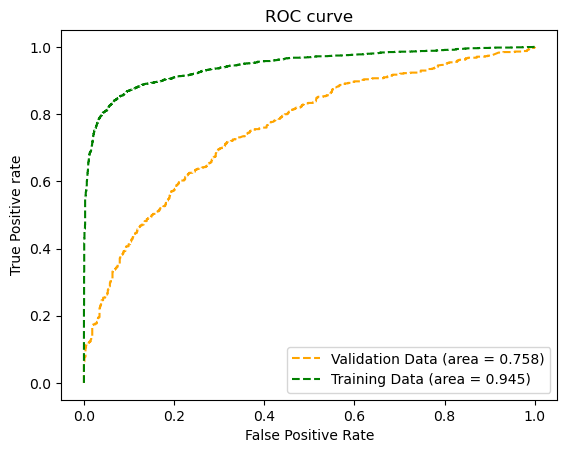

Epoch 1/5
381/381 [==============================] - 7s 17ms/step - loss: 0.7794 - auc_8: 0.7445 - val_loss: 0.6783 - val_auc_8: 0.7100
Epoch 2/5
381/381 [==============================] - 6s 15ms/step - loss: 0.4824 - auc_8: 0.8807 - val_loss: 0.6679 - val_auc_8: 0.7227
Epoch 3/5
381/381 [==============================] - 5s 12ms/step - loss: 0.4144 - auc_8: 0.9085 - val_loss: 0.6703 - val_auc_8: 0.7215
Epoch 4/5
381/381 [==============================] - 5s 12ms/step - loss: 0.3842 - auc_8: 0.9204 - val_loss: 0.6689 - val_auc_8: 0.7227
Epoch 5/5
191/191 [==============================] - 1s 4ms/step


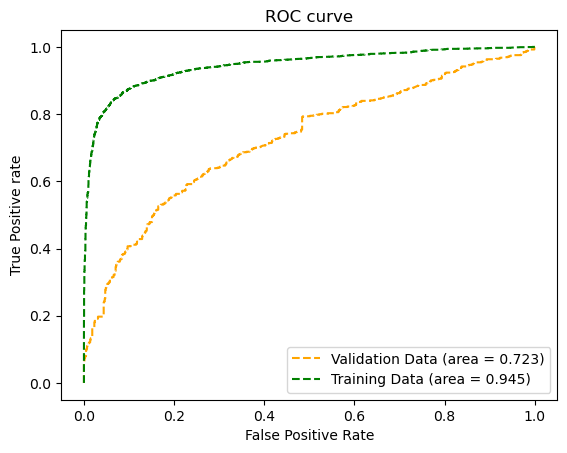

Epoch 1/5
381/381 [==============================] - 5s 12ms/step - loss: 0.7933 - auc_9: 0.7325 - val_loss: 0.5572 - val_auc_9: 0.8497
Epoch 2/5
381/381 [==============================] - 7s 19ms/step - loss: 0.4988 - auc_9: 0.8700 - val_loss: 0.5028 - val_auc_9: 0.8545
Epoch 3/5
381/381 [==============================] - 9s 23ms/step - loss: 0.4340 - auc_9: 0.8998 - val_loss: 0.5111 - val_auc_9: 0.8542
Epoch 4/5
381/381 [==============================] - 8s 20ms/step - loss: 0.4087 - auc_9: 0.9091 - val_loss: 0.5027 - val_auc_9: 0.8525
Epoch 5/5
191/191 [==============================] - 2s 9ms/step


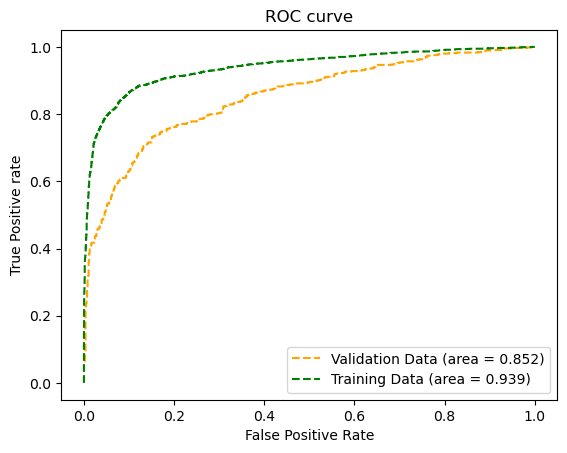

In [47]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5) 

# Now Split the countvectors and target (y)
splits = skf.split(X, y)

# iterate through the train and valid index in splits for 5 folds
for (train_index, valid_index) in splits:
  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
  
  #call the build_model function and initialize the model
    model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
    model.fit(X_train.toarray(), y_train, epochs=5, batch_size = 16, validation_data=(X_valid.toarray(), y_valid))

  # plot the graph between training auc and validation auc
    
    pred = model.predict(X_valid.toarray())
    pred2 = model.predict(X_train.toarray())
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred, pos_label=1)
    fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, pred2, pos_label=1)
    
    auc_valid = metrics.roc_auc_score(y_valid, pred)
    auc_train = metrics.roc_auc_score(y_train, pred2)
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Validation Data (area = {:.3f})'.format(auc_valid))
    plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Training Data (area = {:.3f})'.format(auc_train))
    
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?
Across all five folds, the AUC for the training data stayed very consistent, ranging from 0.94-0.95 which is very good performance (indicates model is likely to assign larger probabilities to random positive examples than random negative ones and is more likely to make correct predictions). For the first four folds, on the validation data, the AUC scores ranged from 0.7-0.76, which are fairly good scores. However, on the fifth fold, the AUC increased up to 0.85, which is a much better result for the model's performance.

# Building Multinomial Navie Bayes on Countvectors

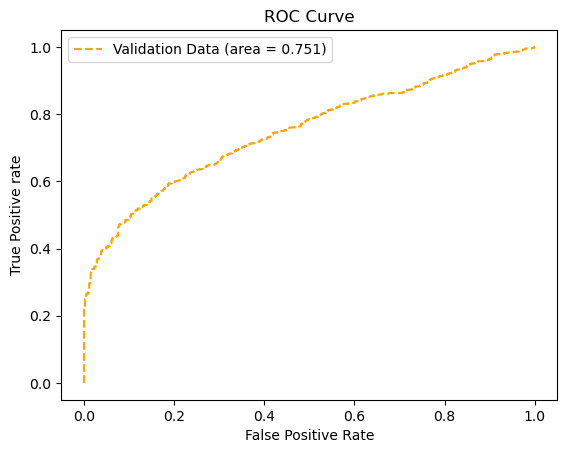

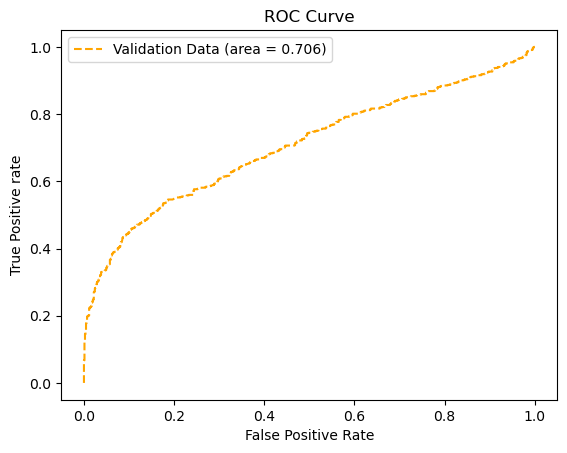

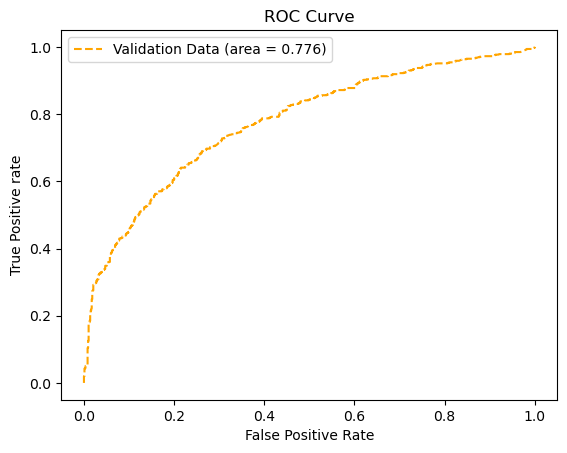

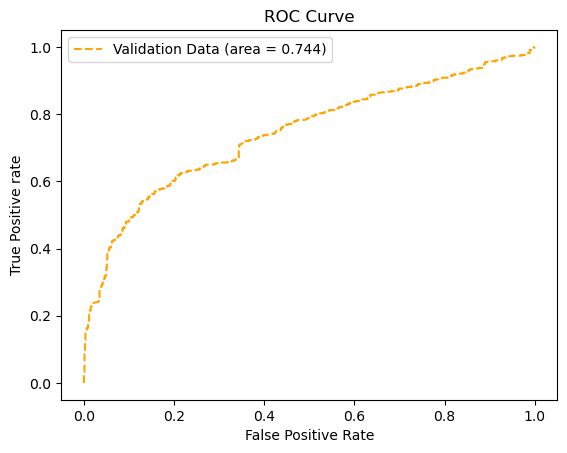

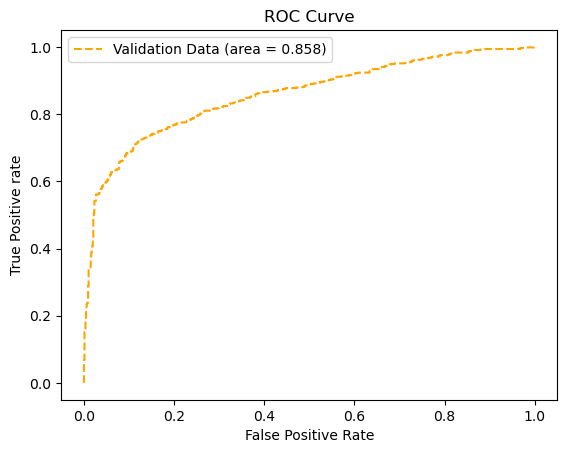

In [39]:
skf = StratifiedKFold(n_splits=5) 
splits = skf.split(X, y)


# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for (train_index, valid_index) in splits:
  # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

  # intialise multinomial navie bayes with default parameters
    clf = MultinomialNB()
  
  # fit the data
    clf.fit(X_train, y_train)
  
  # plot AUC-ROC curve for validation data
    
    pred = clf.predict_proba(X_valid)[:, 1]
    
    fpr3, tpr3, thresholds3 = metrics.roc_curve(y_valid, pred, pos_label=1)
    
    auc_valid = metrics.roc_auc_score(y_valid, pred)
    plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='Validation Data (area = {:.3f})'.format(auc_valid))
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?
For the first 4 folds for Multinomial Naive Bayes, we can see that the model performs pretty well with the 4 curves having AUC scores between 0.71-0.78, indicating that the model is likely to assign larger probabilities to random positive examples than random negative ones. However, on the fifth fold, the AUC went up quite a bit to 0.86 which is a very good performance that indicates it is more likely in our model (on the fifth fold) that correct predictions will be made. 

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** 
Count Vectorizer simply counts the number of times a word appears in a document using a bag-of-words approach which leads to bias in favor of words that appear more frequently while TF-IDF takes into account not only how many times a word appears but also how important that word is to the corpus by calculating weights for the words in a document and penalizing words that occur most frequently across documents as they are likely to be less important/contain less information in determining the content of the document. Word2Vec involves creating static embeddings (either through skip-gram or continuous bag-of-words) that learn one fixed embedding for each word in the vocabulary and instead of calculating how often a word w occurs near a certain word x, we train a classifier (logistic regression), using running text as supervised training data, on a binary prediction task that determines "Is word w likely to show up near word x" and uses the learned weights as the embeddings. While Word2Vec leverages co-occurrence within the local context of neighboring words, GloVe leverages global corpus statistics, using the ratios of probabilities within the word-word co-occurrence matrix.         

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**
The Bag of Words model takes a text document and converts it into a vector of counts for each word which may cause semantic meaning to be lost and will lead to words that appear frequently to be overemphasized when performing Naive Bayes implementation. On the other hand, when using TF-IDF Naive Bayes Implementation, rare words become more prominent and common words are effectively ignored (log idf of words that appear in all documents is 0), making it a more effective model.